In [160]:
import matplotlib.pyplot as plt
from statistics import mean
import numpy as np

In [161]:
def calculate_and_display_metrics(data, title='Sample Query'):
    precisions = []
    recalls = []
    true_positives = 0
    total_predicted_positives = 0
    total_actual_positives = sum(data)
    average_precisions = []

    for i in data:
        total_predicted_positives += 1
        if i == 1:
            true_positives += 1

        precision = true_positives / total_predicted_positives
        recall = true_positives / total_actual_positives if total_actual_positives > 0 else 0

        precisions.append(precision)
        recalls.append(recall)

        average_precisions.append(precision) if i == 1 else None

    # Calculate average precision
    average_precision = mean(average_precisions)
    print('Average Precision: ', average_precision)

    interpolated_precisions = []
    interpolated_precisions_indexes = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    for i in interpolated_precisions_indexes:
        for idx, value in enumerate(recalls):
            if value >= i:
                index = idx
                break

        
        actual_value = max(precisions[index:])
        
        interpolated_precisions.append(np.round(actual_value,2))

    print('Interpolated Precisions: ', interpolated_precisions)
    
    # Plotting
    steps = range(1, len(data) + 1)

    middle_point = int(len(steps) / 2)
    
    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    
    axs[0].plot(steps, precisions, label='Precision', color='red', marker='o')
    axs[0].plot(steps, recalls, label='Recall', color='blue', marker='o')
    axs[0].axhline(y=average_precision, color='green', linestyle='--', label='Avg Precision')
    # Displaying the average_precision value on the graph
    axs[0].text(len(steps) + 1.6, average_precision - 0.01, f'{average_precision:.2f}', 
                horizontalalignment='center', color='green', fontsize=10)

    axs[0].set_xlabel('Step')
    axs[0].set_ylabel('Metric Value')
    axs[0].set_title('Precision and Recall over Steps')
    axs[0].set_ylim([-0.05, 1.05])  # set the y-axis limits
    axs[0].set_xticks(range(1, len(data) + 1, 1))
    axs[0].legend()
    axs[0].grid(axis='y')
    
    axs[1].plot(interpolated_precisions_indexes, interpolated_precisions, label='Precision-Recall Curve', color='red', marker='o')
    axs[1].set_xlabel('Recall')
    axs[1].set_ylabel('Precision')
    axs[1].set_title('Precision-Recall Curve (Interpolated)')
    axs[1].set_ylim([-0.05, 1.05])  # set the y-axis limits
    axs[1].set_xlim([-0.05, 1.05])  # set the x-axis limits
    axs[1].legend()
    axs[1].grid()
    
    plt.suptitle(title)

    plt.show()


Average Precision:  0.7436914936914937
Interpolated Precisions:  [1.0, 1.0, 1.0, 1.0, 0.83, 0.83, 0.57, 0.57, 0.57, 0.45, 0.45]


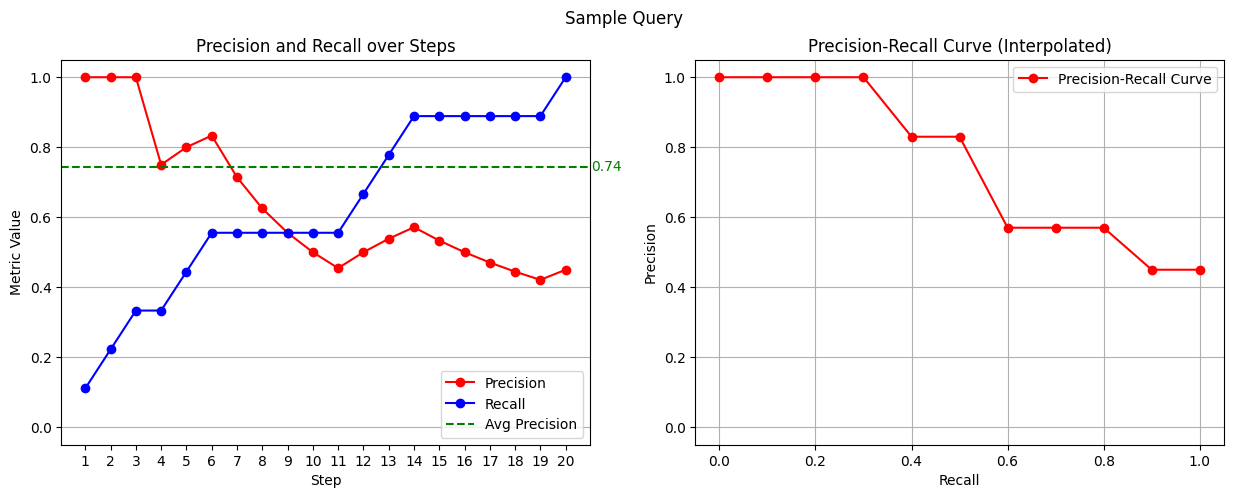

In [162]:
# Example data
data = [1,1,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1]

# Calculate precision and recall
calculate_and_display_metrics(data)
